In [1]:
import re
import string
import warnings

import matplotlib.lines as mlines
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
plt.rcParams["font.serif"] = "Times New Roman"

In [2]:
df = pd.read_csv("vader_sentiment_tweets.csv")

In [15]:
# cluster labels
labels = np.arange(5)
label_names = ["Far Right", "Right Centrist", "Centrist", "Left Centrist", "Far Left"][
    ::-1
]

In [4]:
# map label names

df.columns

Index(['tweet_id', 'username', 'party', 'tweet', 'clean_text',
       'favorite_count', 'retweet_count', 'created_at', 'source',
       'social_policy', 'geopolitical_policy', 'policies', 'policy',
       'name_punch', 'name_gov', 'progressive_score', 'state_tilt', 'rank',
       'score', 'govtrack_cluster', 'progressive_cluster', 'govtrack_class',
       'positive_sentiment', 'neutral_sentiment', 'negative_sentiment',
       'compound_sentiment', 'sentiment_text'],
      dtype='object')

In [5]:
df.head(1)

,tweet_id,username,party,tweet,clean_text,favorite_count,retweet_count,created_at,source,social_policy,...,rank,score,govtrack_cluster,progressive_cluster,govtrack_class,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment,sentiment_text
0,1453097115664662536,RepMikeGarcia,R,I joined fellow China Task Force lawmakers in ...,joined fellow china task force lawmakers in s...,43,29,2021-10-26 20:32:04+00:00,Twitter Web App,NaN,...,#218,0.44,2,3,Centrist,0.000001,0.807001,0.193001,-0.771699,negative


### Boxplots, Violin, and Swarmplots

In [ ]:
plt.figure(1, figsize=(6, 4))

sns.violinplot(x="party", y="compound_sentiment", data=df)
sns.swarmplot(x="party", y="compound_sentiment", data=df, palette="Paired")
plt.ylabel("Sentiment")
plt.title("Violinplots & Swarmplots")
plt.show()

In [7]:
def custom_legend(ax, bbox: tuple = (0, 0)):

    #     legends
    title = mlines.Line2D([], [], label="Party", color="white", linewidth=7)
    red_patch = mlines.Line2D([], [], color="red", label="R", linewidth=7, alpha=0.5)
    blue_path = mlines.Line2D([], [], color="blue", label="D", linewidth=7, alpha=0.5)

    leg = ax.legend(
        handles=[title, blue_path, red_patch],
        bbox_to_anchor=bbox,
        borderaxespad=0,
        ncol=3,
        frameon=False,
    )

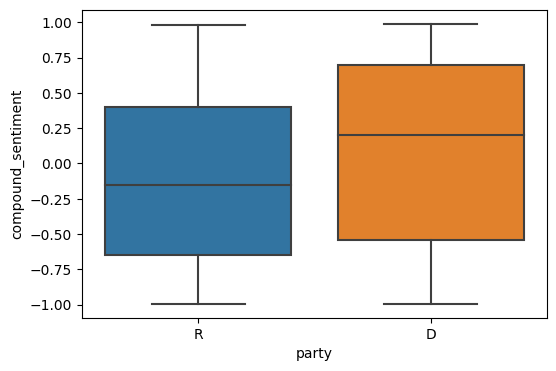

In [8]:
# plot boxplot of sentiment against party

plt.figure(1, figsize=(6, 4))

sns.boxplot(data=df, x="party", y="compound_sentiment")

plt.show()

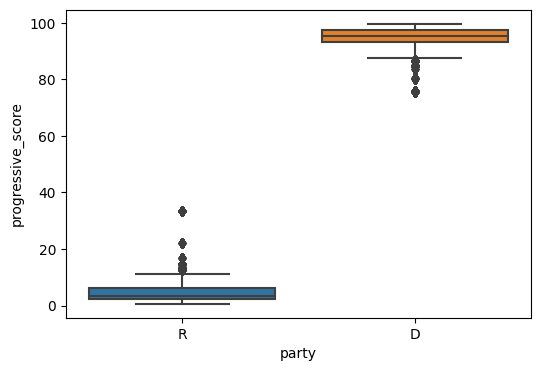

In [9]:
# plot boxplot of sentiment against progressive_score

plt.figure(1, figsize=(6, 4))

sns.boxplot(data=df, x="party", y="progressive_score")

plt.show()

### Distribution Plots

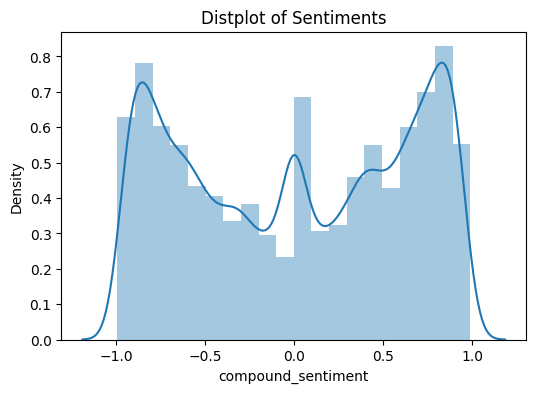

In [10]:

# sentiment

plt.figure(1, figsize=(6, 4))

sns.distplot(df["compound_sentiment"], bins=20)
plt.title("Distplot of Sentiments")

plt.show()

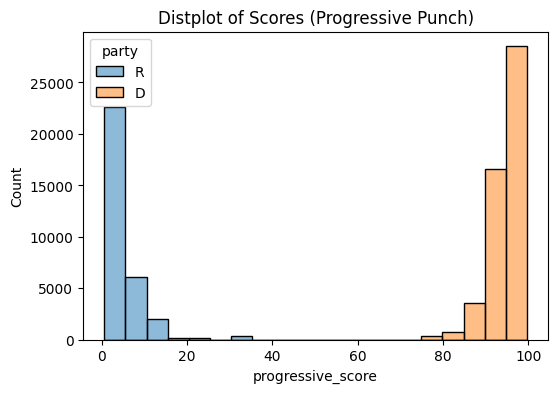

In [11]:
# sentiment

plt.figure(1, figsize=(6, 4))

sns.histplot(data=df, x="progressive_score", bins=20, hue="party")
plt.title("Distplot of Scores (Progressive Punch)")
# plt.legend(loc='best')

plt.show()

In [12]:
df.head(2)

,tweet_id,username,party,tweet,clean_text,favorite_count,retweet_count,created_at,source,social_policy,...,rank,score,govtrack_cluster,progressive_cluster,govtrack_class,positive_sentiment,neutral_sentiment,negative_sentiment,compound_sentiment,sentiment_text
0,1453097115664662536,RepMikeGarcia,R,I joined fellow China Task Force lawmakers in ...,joined fellow china task force lawmakers in s...,43,29,2021-10-26 20:32:04+00:00,Twitter Web App,NaN,...,#218,0.44,2,3,Centrist,0.000001,0.807001,0.193001,-0.771699,negative
1,1511713375218245640,RepGallagher,R,"Rep. Gallagher: ""If we do not invest in hard p...",rep gallagher if we do not invest in hard powe...,25,11,2022-04-06 14:32:09+00:00,Twitter Web App,NaN,...,#52,0.76,4,4,Far Right,0.113001,0.786001,0.101001,-0.128999,negative


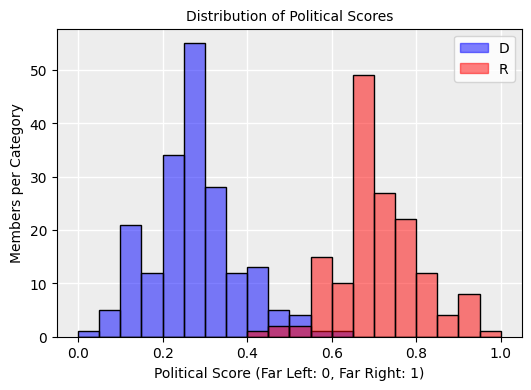

In [16]:
# sentiment

fig1 = plt.figure(1, figsize=(6, 4))

ax = fig1.add_subplot(1, 1, 1)


# # set axis below
# ax.grid(zorder=0)

sns.histplot(
    data=df[["username", "score", "party"]].drop_duplicates(),
    x="score",
    bins=20,
    hue="party",
    palette={"D": "b", "R": "r"},
    **dict(alpha=0.5),
)

# grid lines based on major tick
ax.grid(which="major", color="w", linestyle="-", linewidth=1)

ax.yaxis.grid(True)  # Hide the horizontal gridlines
ax.xaxis.grid(True)  # Show the vertical gridlines

# set axis below
ax.set_axisbelow(True)

plt.title("Distribution of Political Scores", fontsize=10)
plt.ylabel("Members per Category", fontsize=10)
ax.set_facecolor("#D3D3D3")
ax.patch.set_alpha(0.4)
plt.xlabel("Political Score (Far Left: 0, Far Right: 1)", fontsize=10)

#     legends
red_patch = mpatch.Patch(color="red", label="R", alpha=0.5)
blue_path = mpatch.Patch(color="blue", label="D", alpha=0.5)

leg = ax.legend(handles=[blue_path, red_patch], frameon=True, loc="best")

plt.show()
fig1.savefig(
    "/home/denniesbor/Dropbox/twitter_nlp_project2/assets/govtrack_hist.png",
    dpi=100,
    bbox_inches="tight",
)

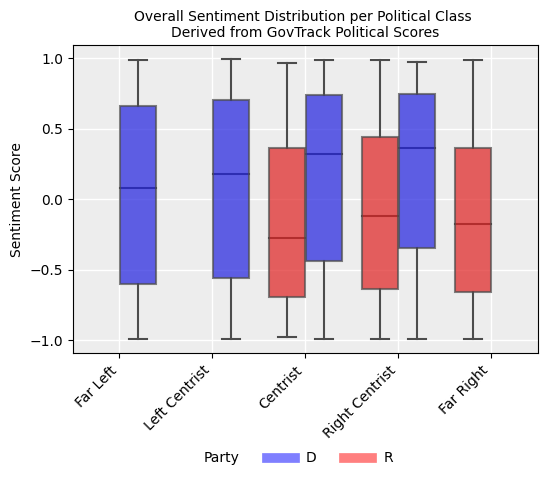

In [17]:
# plot boxplot of the clusters

fig2 = plt.figure(1, figsize=(6, 4))
ax = fig2.add_subplot(1, 1, 1)

sns.boxplot(
    data=df,
    x="govtrack_cluster",
    y="compound_sentiment",
    hue="party",
    dodge=True,
    palette={"D": "b", "R": "r"},
    boxprops=dict(alpha=0.7, zorder=3),
)

# grid lines based on major tick (x)
ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

ax.xaxis.grid(True)  # Show the vertical gridlines

# y axis grid
ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True)

# grid lines based on minor tick (y)
ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

# Remove minor ticks
ax.tick_params(which="minor", bottom=False, left=False)


# set axis below
ax.set_axisbelow(True)

plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=10)
ax.set_xticks(labels)
ax.set_xticklabels(labels=label_names, fontsize=10, rotation=45, ha="right")
ax.set_facecolor("#D3D3D3")
ax.patch.set_alpha(0.4)
plt.title(
    "Overall Sentiment Distribution per Political Class \nDerived from GovTrack Political Scores",
    fontsize=10,
)
plt.ylabel("Sentiment Score", fontsize=10)
plt.xlabel("")
# custom legend
custom_legend(ax, bbox=(0.7, -0.3))

plt.show()

fig2.savefig(
    "/home/denniesbor/Dropbox/twitter_nlp_project2/assets/general_sentiment.png",
    dpi=100,
    bbox_inches="tight",
)

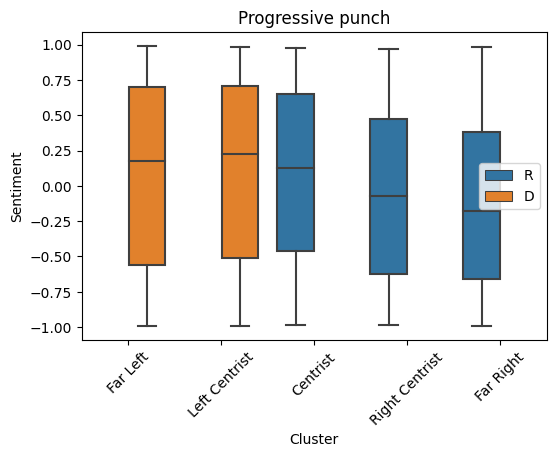

In [18]:
# plot boxplot of the clusters

fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df, x="progressive_cluster", y="compound_sentiment", hue="party")
plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=10)
plt.title("Progressive punch")
plt.ylabel("Sentiment")
plt.xlabel("Cluster")
plt.legend(loc="best")
plt.show()

In [21]:
# plot per policy
import json

# open json file consisting of policies and its sub-groups
with open("data.json") as json_file:
    categories = json.load(json_file)

In [22]:
articles = ["and", "LGBTQ", "the", "of"]

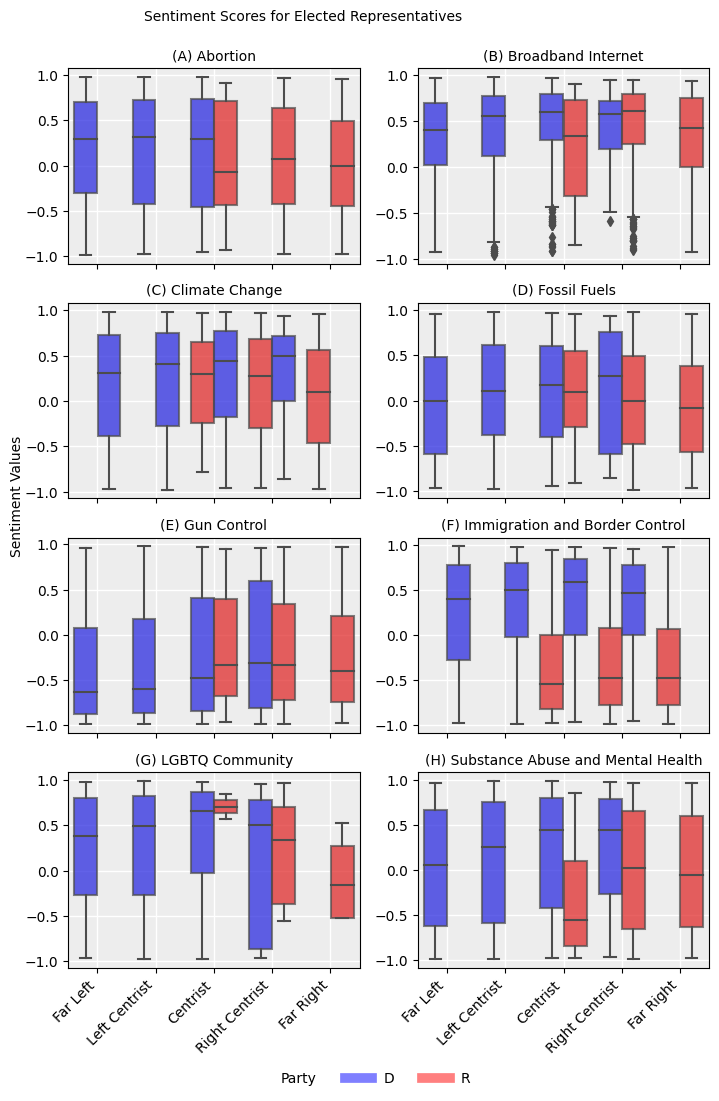

In [23]:
# social policies

social_policies = categories["Social Policies"]
social_policies = list(social_policies.keys())
social_policies.remove("All")

fig3 = plt.figure(1, figsize=(8.27, 11.69), dpi=100)
n = 0

for policy in sorted(social_policies, key=lambda x: x.lower()):

    str_list = string.ascii_uppercase

    title = " ".join(
        [
            word.capitalize() if word not in articles else word
            for word in policy.split(" ")
        ]
    )
    # category df
    cat_df = df[df.policies.str.contains(r"%s" % policy, re.I, regex=True)]

    n += 1

    ax = fig3.add_subplot(4, 2, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.boxplot(
        data=cat_df,
        x="govtrack_cluster",
        y="compound_sentiment",
        hue="party",
        dodge=True,
        palette={"D": "b", "R": "r"},
        boxprops=dict(alpha=0.7),
    )
    # plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=8)
    ax.set_xticklabels([])
    if n > 6:
        ax.set_xticks(labels)
        ax.set_xticklabels(labels=label_names, fontsize=10, rotation=45, ha="right")
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{}".format(f"({str_list[n-1]}) {title}"), fontsize=10)
    ax.get_legend().remove()

    ax.set_facecolor("#D3D3D3")
    ax.patch.set_alpha(0.4)

    # grid lines based on major tick (x)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

    ax.xaxis.grid(True)  # Show the vertical gridlines

    # y axis grid
    ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True)

    # grid lines based on minor tick (y)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

    # Remove minor ticks
    ax.tick_params(which="minor", bottom=False, left=False)

    # set axis below
    ax.set_axisbelow(True)

# custom legend
custom_legend(ax, bbox=(0.2, -0.5))
ax.text(-7.5, 3.5, "Sentiment Values", rotation=90)  # y labels
ax.text(
    -5.2,
    9.4,
    "Sentiment Scores for Elected Representatives",
    fontsize=10,
)
plt.show()

# fig3.savefig(
#     "/home/denniesbor/Dropbox/twitter_nlp_project2/assets/social_policies_cluster.png",
#     dpi=100,
#     bbox_inches="tight",
# )

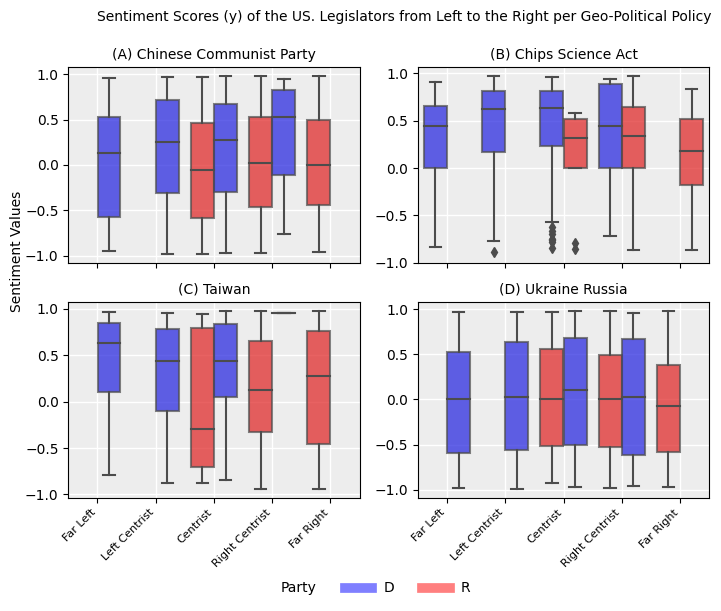

In [24]:
# geopolitical policies

geo_political_policies = categories["Geo Political Policies"]
geo_political_policies = list(geo_political_policies.keys())
geo_political_policies.remove("All")

fig4 = plt.figure(1, figsize=(8.27, 11.69), dpi=100)
n = 0

for policy in sorted(geo_political_policies, key=lambda x: x.lower()):

    title = " ".join(
        [
            word.capitalize() if word not in articles else word
            for word in policy.split(" ")
        ]
    )
    # category df
    cat_df = df[df.policies.str.contains(r"%s" % policy, re.I, regex=True)]

    n += 1

    ax = fig4.add_subplot(4, 2, n)
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    sns.boxplot(
        data=cat_df,
        x="govtrack_cluster",
        y="compound_sentiment",
        hue="party",
        dodge=True,
        palette={"D": "b", "R": "r"},
        boxprops=dict(alpha=0.7),
    )
    # plt.xticks(ticks=labels, rotation=45, labels=label_names, fontsize=8)
    ax.set_xticklabels([])
    if n > 2:
        ax.set_xticks(labels)
        ax.set_xticklabels(labels=label_names, fontsize=8, rotation=45, ha="right")
    plt.ylabel("")
    plt.xlabel("")
    plt.title("{}".format(f"({str_list[n-1]}) {title}"), fontsize=10)
    ax.get_legend().remove()
    ax.set_facecolor("#D3D3D3")
    ax.patch.set_alpha(0.4)

    # grid lines based on major tick (x)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

    ax.xaxis.grid(True)  # Show the vertical gridlines

    # y axis grid
    ax.set_yticks(np.arange(-1, 1.5, 0.5), major=True)

    # grid lines based on minor tick (y)
    ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

    # Remove minor ticks
    ax.tick_params(which="minor", bottom=False, left=False)

    # set axis below
    ax.set_axisbelow(True)

# custom legend
custom_legend(ax, bbox=(0.2, -0.4))

ax.text(-7.5, 1, "Sentiment Values", rotation=90)  # y labels
plt.text(
    -6,
    4.2,
    "Sentiment Scores (y) of the US. Legislators from Left to the Right per Geo-Political Policy",
    fontsize=10,
)
plt.show()
# fig4.savefig(
#     "/home/denniesbor/Dropbox/twitter_nlp_project2/assets/geo_policies_cluster.png",
#     dpi=100,
#     bbox_inches="tight",
# )

### Descriptive Statistics

In [28]:
from scipy import stats

In [29]:
# democrats stats

(df.query("party == 'D'")[["score", "username"]].drop_duplicates()).describe()

,score
count,192.000000
mean,0.275729
std,0.105307
min,0.000000
25%,0.210000
50%,0.280000
75%,0.340000
max,0.640000


In [30]:
#  republicans stats

(df.query("party == 'R'")[["score", "username"]].drop_duplicates()).describe()

,score
count,153.000000
mean,0.710000
std,0.098609
min,0.440000
25%,0.660000
50%,0.700000
75%,0.760000
max,1.000000


In [31]:
# mode R

stats.mode(df.query("party == 'R'")[["score", "username"]].drop_duplicates()["score"])

ModeResult(mode=array([0.7]), count=array([12]))

In [32]:
# mode R

stats.mode(df.query("party == 'D'")[["score", "username"]].drop_duplicates()["score"])

ModeResult(mode=array([0.3]), count=array([15]))

### Compute IQR

In [34]:
stats.mode(df.query(f"party == 'D'")["score"])

ModeResult(mode=array([0.26]), count=array([4085]))

In [35]:
disp_list_geo = []
disp_list_soc = []

for i, category in enumerate([geo_political_policies, social_policies]):

    for policy in sorted(category, key=lambda x: x.lower()):

        mapped_scores = dict(map(lambda i, j: (i, j), labels, label_names))

        for score, political_class in enumerate(mapped_scores.values()):

            df_party = df.query(f"govtrack_cluster == {score}")
            df_vals = df_party[
                df_party.policies.str.contains(r"%s" % policy, re.I, regex=True)
            ]["compound_sentiment"]

            min_ = np.min(df_vals)
            max_ = np.max(df_vals)
            range_ = np.round(max_ - min_, 3)
            Q1 = np.round(np.percentile(df_vals, 25, interpolation="midpoint"), 3)
            Q2 = np.round(np.median(df_vals), 3)
            Q3 = np.round(np.percentile(df_vals, 75, interpolation="midpoint"), 3)
            IQR = np.round(Q3 - Q1, 3)
            mean = np.round(np.mean(df_vals), 3)
            std = np.round(np.std(df_vals), 3)

            disp = {
                "policy": policy,
                "political_score": score,
                "political_class": political_class,
                "min": np.round(min_, 3),
                "max": np.round(max_, 3),
                "range": range_,
                "Q1": Q1,
                "Q2": Q2,
                "Q3": Q3,
                "IQR": IQR,
                "mean": mean,
                "STD": std,
            }

            if i == 0:
                disp_list_geo.append(disp)
            else:
                disp_list_soc.append(disp)

In [24]:
# export into pandas dataframes

df_percentiles_social = pd.DataFrame(disp_list_soc)
df_percentiles_geo = pd.DataFrame(disp_list_geo)

In [25]:
df.govtrack_cluster.unique()

array([1, 3, 4, 2, 0])




#### Group DF

In [26]:
#  group the data by category and party
#  geo political policies

df_percentiles_geo = df_percentiles_geo.groupby(
    ["policy", "political_score", "political_class"]
).sum()
df_percentiles_geo.reset_index(inplace=True)
df_percentiles_geo.to_csv("geo_stats_all.csv", index=False)

In [27]:
#  group the data by category and party
#  social policies

df_percentiles_social.groupby(["policy", "political_score", "political_class"]).sum()
df_percentiles_social.reset_index(inplace=True)
df_percentiles_social.to_csv("socia_stats_all.csv", index=False)

In [28]:
disp_list_agg_geo = []
disp_list_agg_soc = []

for i, category in enumerate([geo_political_policies, social_policies]):

    for policy in sorted(category, key=lambda x: x.lower()):

        mapped_scores = dict(
            map(lambda i, j: (i, j), [0, 1], ["Agg Left", "Agg Right"])
        )

        for cat, political_class in enumerate(mapped_scores.values()):

            if cat == 0:

                df_party = df.query("govtrack_cluster == 0 | govtrack_cluster == 1")

            else:
                df_party = df.query(f"govtrack_cluster == 3 | govtrack_cluster == 4")

            df_vals = df_party[
                df_party.policies.str.contains(r"%s" % policy, re.I, regex=True)
            ]["compound_sentiment"]

            min_ = np.min(df_vals)
            max_ = np.max(df_vals)
            range_ = np.round(max_ - min_, 3)
            Q1 = np.round(np.percentile(df_vals, 25, interpolation="midpoint"), 3)
            Q2 = np.round(np.median(df_vals), 3)
            Q3 = np.round(np.percentile(df_vals, 75, interpolation="midpoint"), 3)
            IQR = np.round(Q3 - Q1, 3)
            mean = np.round(np.mean(df_vals), 3)
            std = np.round(np.std(df_vals), 3)

            disp = {
                "policy": policy,
                "political_score": cat,
                "political_class": political_class,
                "min": np.round(min_, 3),
                "max": np.round(max_, 3),
                "range": range_,
                "Q1": Q1,
                "Q2": Q2,
                "Q3": Q3,
                "IQR": IQR,
                "mean": mean,
                "STD": std,
            }

            if i == 0:
                disp_list_agg_geo.append(disp)
            else:
                disp_list_agg_soc.append(disp)


                # export into pandas dataframes

df_agg_social = pd.DataFrame(disp_list_agg_soc)
df_agg_geo = pd.DataFrame(disp_list_agg_geo)

In [29]:
#  group the data by category and party
#  geo political policies

df_agg_geo = df_agg_geo.groupby(
    ["policy", "political_score", "political_class"]
).sum()
df_agg_geo.reset_index(inplace=True,)
df_agg_geo.to_csv("geo_stats_agg_all.csv", index=False)

In [30]:
#  group the data by category and party
#  geo political policies

df_agg_social = df_agg_social.groupby(
    ["policy", "political_score", "political_class"]
).sum()
df_agg_social.reset_index(inplace=True)
df_agg_social.to_csv("soc_stats_agg_all.csv", index=False)